Linear Regression in Python with Scikit-Learn
------------------------------------------------------------------

There are two types of supervised machine learning algorithms: Regression and classification. The former predicts continuous value outputs while the latter predicts discrete outputs. For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether a tumor is dangerous or not is a classification problem.

Linear Regression Theory
-------------------------------------

Let's consider a scenario where we want to determine the linear relationship between the numbers of hours a student studies and the percentage of marks that student scores in an exam. We want to find out that given the number of hours a student prepares for a test, about how high of a score can the student achieve? If we plot the independent variable (hours) on the x-axis and dependent variable (percentage) on the y-axis, linear regression gives us a straight line that best fits the data points, as shown in the figure below.

![linearRegreesionTheory](datasets_n_images/images/linearRegreesionTheory.png 'linearRegreesionTheory')

We know that the equation of a straight line is basically:

y = mx + b  

+ Where b is the intercept (y-intercept) and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). 

There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.

This same concept can be extended to the cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of house based upon its area, number of bedrooms, average income of the people in the area, the age of the house, and so on. In this case the dependent variable is dependent upon several independent variables. A regression model involving multiple variables can be represented as:

y = b0 + m1b1 + m2b2 + m3b3 + ... ... mnbn

This is the equation of a hyper plane. Remember, a linear regression model in two dimensions is a straight line; in three dimensions it is a plane, and in more than three dimensions, a hyper plane.

Linear Regression with Python Scikit Learn
--------------------------------------------------------------

# 1. Simple Linear Regression

We will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# necessary imports
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
"""
%matplotlib is a magic function in IPython. 
It is a magic function that renders the figure in a 
notebook (instead of displaying a dump of the figure object).
https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
"""

# loading the dataset
dataset=pd.read_csv('C:/Users/Girish Salunke/AppData/Local/Programs/Python/Python37/ML/datasets_n_images/datasets_module_4/student_scores.csv')

dataset.shape  

(25, 2)

In [4]:
# dataset looks like  .. use head()
# type your code here
dataset.head()
#Similarly you can use dataset.tail

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# see statistical details of the dataset .... use describe()
# type your code here
dataset.describe()
#describe is under pandas

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage scores')

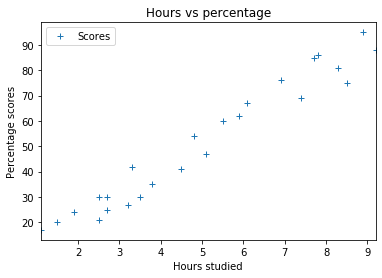

In [31]:
 # let's plot our data points on 2-D graph  .. Your code here
# type your code here
dataset.plot(x='Hours',y='Scores',style='+',legend=True)
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scores')
# type your code here


In [33]:
##### Preparing the Data
X = dataset.iloc[:, :-1].values #all rows in all columns of df except last column 
y = dataset.iloc[:, 1].values  #all row values of column 1 i.e 'Scores'

# The attributes are stored in the X variable. 
# We specified "-1" as the range for columns since we wanted our attribute 
# set to contain all the columns except the last one, which is "Scores".

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #default tset_size=0.25,
                                                                                            #random_state=seedvalue

# Training the Algorithm
from sklearn.linear_model import LinearRegression  

# type your code here
regressor= LinearRegression()
regressor.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# In the theory section we said that linear regression model basically 
# finds the best value for the intercept and slope, which results in a 
# line that best fits the data. 
# To see the value of the intercept and slope calculated 
# by the linear regression algorithm for our dataset, 
# execute the following code.

# To retrieve the intercept:  -> use intercept_ attribiute
# type your code here

print("Intercept",regressor.intercept_)
# For retrieving the slope:  -> use coef_ attribute   
# type your code here
print("/nSlope:",regressor.coef_)

Intercept 2.018160041434683
/nSlope: [9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

In [35]:
# Making Predictions
# Now that we have trained our algorithm, it's time to make some predictions.
# type your code here
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df  

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [36]:
# Evaluating the Algorithm
# type your code here
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


The root mean squared error for our algorithm is 4.64, which is less than 10% of the mean of all the values in the 'Scores' column(51.64). This means that our algorithm did a fine prediction job. [Getting a value <10% is considered good.]

Absolute Error is the amount of error in your measurements. It is the difference between the measured value and “true” value. For example, if a scale states 90 pounds but you know your true weight is 89 pounds, then the scale has an absolute error of 90 lbs – 89 lbs = 1 lbs.
This can be caused by your scale not measuring the exact amount you are trying to measure. For example, your scale may be accurate to the nearest pound. If you weigh 89.6 lbs, the scale may “round up” and give you 90 lbs. In this case the absolute error is 90 lbs – 89.6 lbs = .4 lbs.

The Mean Absolute Error(MAE) is the average of all absolute errors. 

Mean Squared Error: https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

Root Mean Squared Error: It is squareroot of MSE

Mean Absolute Error vs Mean Squared Error vs Root Mean Squared Error:
--
https://youtu.be/KzHJXdFJSIQ




Important Observationn:
--
MAE: 
--
1. Residual error
2. Error increases in proportional fashion

MSE:
--
1. Squared error
2. Outliers are heavily penalised
3. MSE>MAE
4. Error increases in quadratic fashion

RMSE:
--
1 Resolves the issue with MSE where it gives error in of a vaery large magnitude due to its squared nature. Since the    errors are in squared magnitudes the errors were not comparable to our actual mean easily.
2. Hence taking a sqrt() of MSE we get RMSE which makes our job easy.
3. RMSE represents the STD Deviationn of the residuals.




# 2. Multiple Linear Regression
--------------------------------------------------

In the previous section we performed linear regression involving two variables. Almost all real world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression". 

In this section we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

In [3]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing the Dataset
dataset = pd.read_csv('./datasets_n_images/datasets_module_4/petrol_consumption.csv')

dataset.head() 

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
# To see statistical details of the dataset, execute the following command:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [5]:
# Preparing the Data
# divide the data into attributes and labels
X = dataset.drop('Petrol_Consumption', axis=1)  #axis=1 means search for Petrol_Consumption column_wise , axis=0 means row_wise
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

# Training and Making Predictions
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient']) #pd.df(data,rowname,colname) 
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


This means that for a unit increase in "petroltax", there is a decrease of 40 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.324 billion gallons of gas consumption. We can see that "Averageincome" and "Paved_Highways" have a very little effect on the gas consumption.

In [6]:
# Making Predictions
y_pred = regressor.predict(X_test)  

# compare the actual output values for X_test with the predicted values
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df  

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [7]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.3447875883585
Root Mean Squared Error: 68.31064915215165


You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states. This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

1> Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.

2> Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

3> Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.

4>How to improve data or increase data in US Gallon Petrol Comsumption?
How to generate more data?
Generate Samples using Sampling, do granularity, instead of talking in terms of stones, talk in terms of sand.....instead of talking of chembur, talk of sindhi soc, rcf, bpcl,etc i.e divide the city into streets....This is called as Sampling. The more granular your sample, the more better the model will work